## First-Derivative
1) Read zebra.jpg image, convert it to gray scale and show the horizontal and vertical gradients images using [1 -1] filter (normalize the image to be 0-255 before showing).  Show the gradient magnitude as well. <br>
2) Apply three different thresholds on the magnitude. <br>
3) Do the same with the filter [1 0 -1]. What are the differences?

In [1]:
import cv2 
img = cv2.imread('zebra.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255

#### Filter [1,-1]

In [15]:
import numpy as np

convolution_kernel_x = np.array([[1,-1]])
convolution_kernel_y = np.array([[1],[-1]])


gray_x = cv2.filter2D(gray, -1, convolution_kernel_x)
gray_y = cv2.filter2D(gray, -1, convolution_kernel_y)
magnitude = np.sqrt(np.power(gray_x,2)+np.power(gray_y,2))

In [16]:
gray_x_pic = gray_x - np.min(gray_x)
gray_x_pic /= np.max(gray_x_pic)

gray_y_pic = gray_y - np.min(gray_y)
gray_y_pic /= np.max(gray_y_pic)

Text(0.5, 1.0, 'magnitude>0.95')

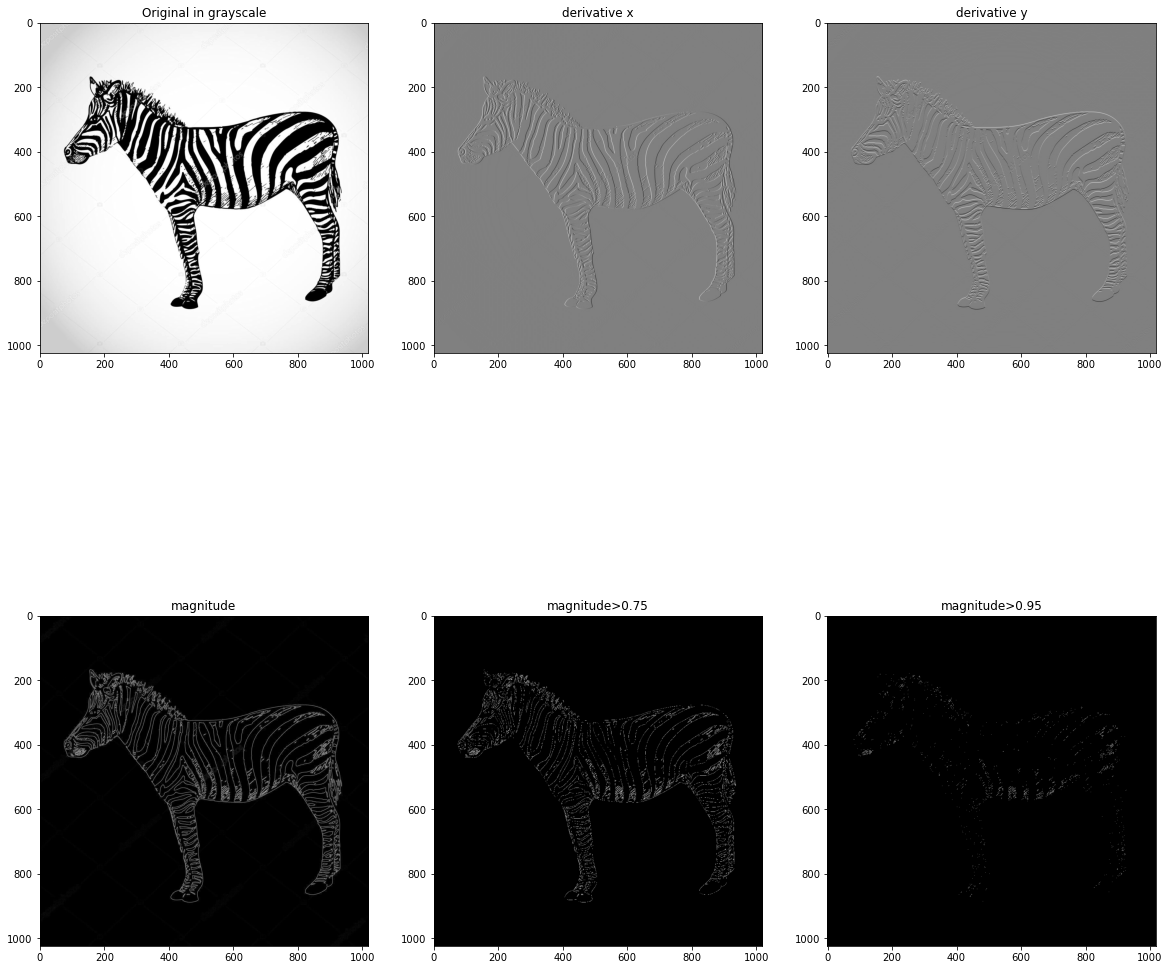

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.subplot(2,3,1); plt.imshow(gray, cmap='gray'); plt.title('Original in grayscale')
plt.subplot(2,3,2); plt.imshow(gray_x_pic, cmap='gray'); plt.title('derivative x')
plt.subplot(2,3,3); plt.imshow(gray_y_pic, cmap='gray'); plt.title('derivative y')
plt.subplot(2,3,4); plt.imshow(magnitude, cmap='gray'); plt.title('magnitude')
plt.subplot(2,3,5); plt.imshow(magnitude>0.75, cmap='gray'); plt.title('magnitude>0.75')
plt.subplot(2,3,6); plt.imshow(magnitude>0.95, cmap='gray'); plt.title('magnitude>0.95')

#### Filter [1,0,-1]

In [18]:
import numpy as np

convolution_kernel_x = np.array([[1,0,-1]])
convolution_kernel_y = np.array([[1],[0],[-1]])


gray_x = cv2.filter2D(gray, -1, convolution_kernel_x)
gray_y = cv2.filter2D(gray, -1, convolution_kernel_y)
magnitude = np.sqrt(np.power(gray_x,2)+np.power(gray_y,2))

In [19]:
gray_x_pic = gray_x - np.min(gray_x)
gray_x_pic /= np.max(gray_x_pic)

gray_y_pic = gray_y - np.min(gray_y)
gray_y_pic /= np.max(gray_y_pic)

Text(0.5, 1.0, 'magnitude>0.95')

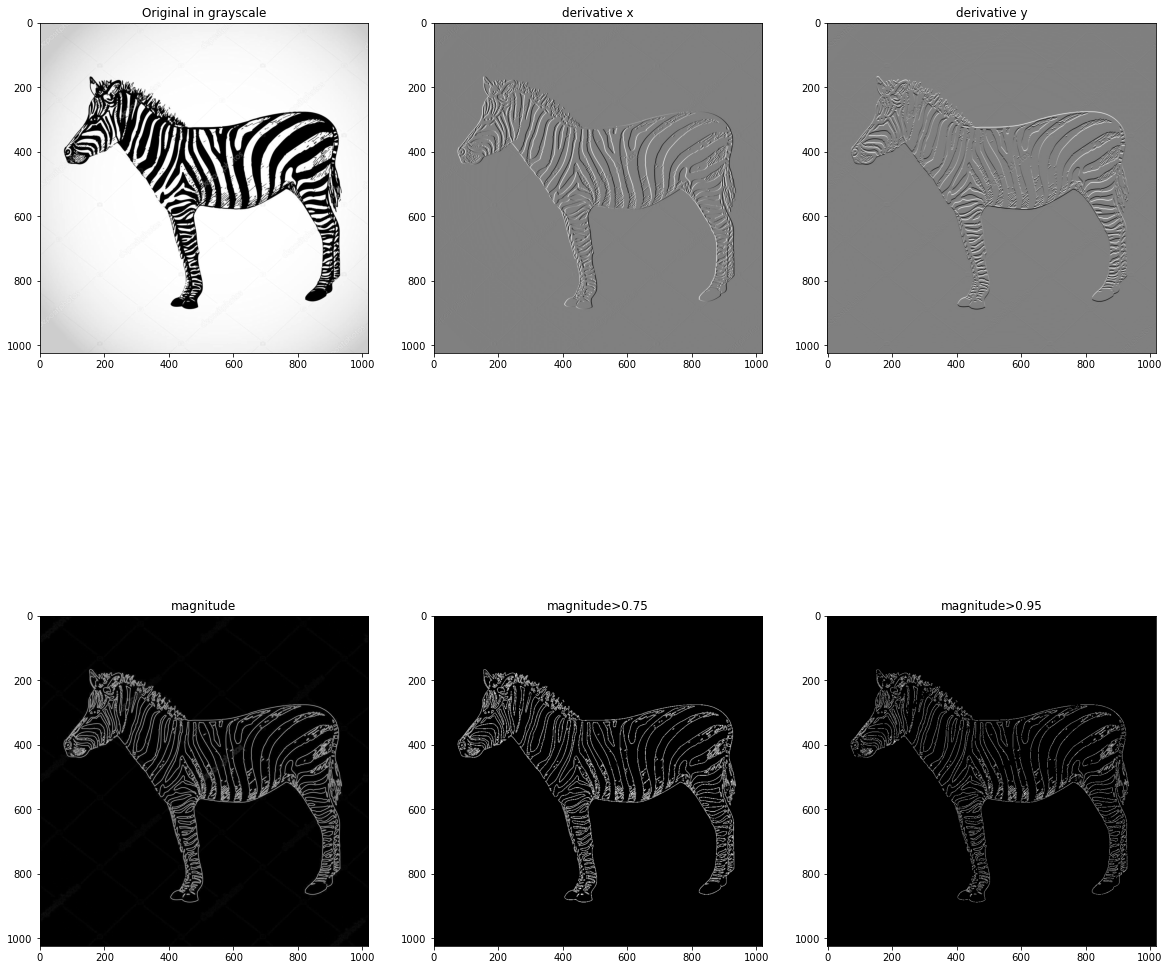

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.subplot(2,3,1); plt.imshow(gray, cmap='gray'); plt.title('Original in grayscale')
plt.subplot(2,3,2); plt.imshow(gray_x_pic, cmap='gray'); plt.title('derivative x')
plt.subplot(2,3,3); plt.imshow(gray_y_pic, cmap='gray'); plt.title('derivative y')
plt.subplot(2,3,4); plt.imshow(magnitude, cmap='gray'); plt.title('magnitude')
plt.subplot(2,3,5); plt.imshow(magnitude>0.75, cmap='gray'); plt.title('magnitude>0.75')
plt.subplot(2,3,6); plt.imshow(magnitude>0.95, cmap='gray'); plt.title('magnitude>0.95')

The detection of the edges is much more clear for the second filter

## Sobel

Read zebra.jpg image, convert it to gray scale and show the horizontal and vertical gradients images using the Sobel operator (normalize the image to be 0-255 before showing). Show the gradient magnitude as well

In [8]:
img = cv2.imread('zebra.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255

Text(0.5, 1.0, 'Magnitude>0.95')

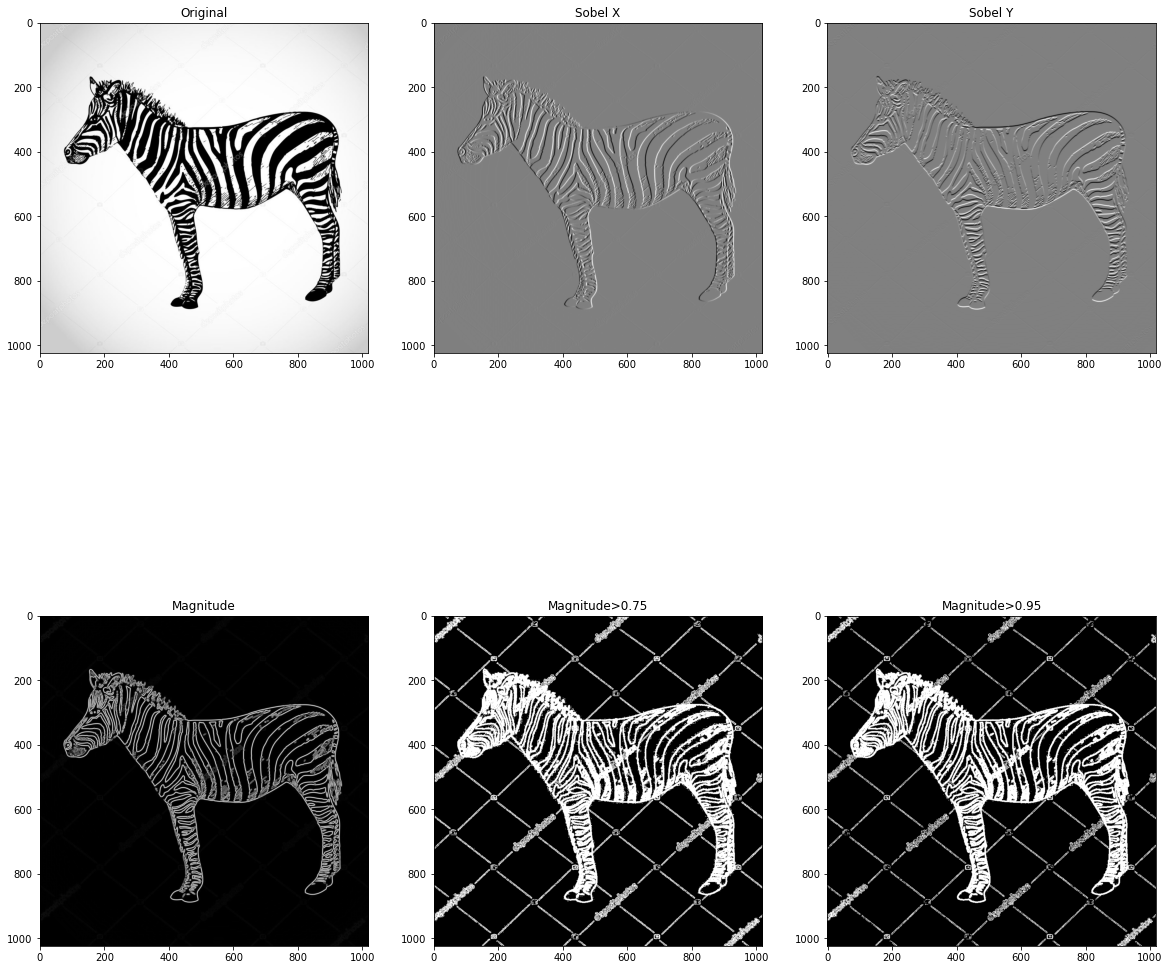

In [9]:
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)
magnitude = np.sqrt(np.power(sobelx,2)+np.power(sobely,2))

sobelx_show = sobelx - np.min(sobelx)
sobelx_show /= np.max(sobelx_show)

sobely_show = sobely - np.min(sobely)
sobely_show /= np.max(sobely_show)


plt.figure(figsize=(20,20))
plt.subplot(2,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original')
plt.subplot(2,3,2),plt.imshow(sobelx_show,cmap = 'gray')
plt.title('Sobel X')
plt.subplot(2,3,3),plt.imshow(sobely_show,cmap = 'gray')
plt.title('Sobel Y')
plt.subplot(2,3,4),plt.imshow(magnitude,cmap = 'gray')
plt.title('Magnitude')
plt.subplot(2,3,5),plt.imshow(magnitude>0.75,cmap = 'gray')
plt.title('Magnitude>0.75')
plt.subplot(2,3,6),plt.imshow(magnitude>0.95,cmap = 'gray')
plt.title('Magnitude>0.95')

## Second-Derivative - Laplacian
1) Read zebra.jpg image, convert it to gray scale and show the laplacian image (normalize the image to be 0-255 before showing). <br>
2) Reduce this image from the original zebra.jpg image - what do you get? <br>

In [10]:
from scipy import signal
img = cv2.imread('zebra.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255
laplacian = cv2.Laplacian(gray,cv2.CV_64F, ksize=3)

laplacian_show = laplacian - np.min(laplacian)
laplacian_show /= np.max(laplacian_show)

In [11]:
sharpen = gray - 2 * laplacian
sharpen[sharpen>1] = 1
sharpen[sharpen<0] = 0

Text(0.5, 1.0, 'Sharp')

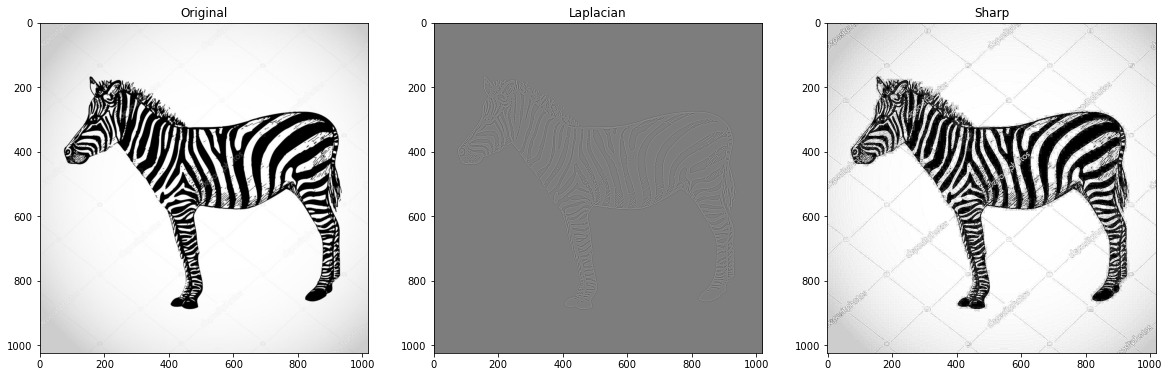

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original')
plt.subplot(1,3,2),plt.imshow(laplacian_show,cmap = 'gray')
plt.title('Laplacian')
plt.subplot(1,3,3),plt.imshow(sharpen,cmap = 'gray')
plt.title('Sharp')

The imagine with sharpened edges

## Smoothing

1) Read zebra.jpg image, apply 3 different "soothness" levels using Gaussian Blur <br>
2) Apply all the above exersice after applying 9x9 Gaussian Blur 

Text(0.5, 1.0, 'Hight Blurred')

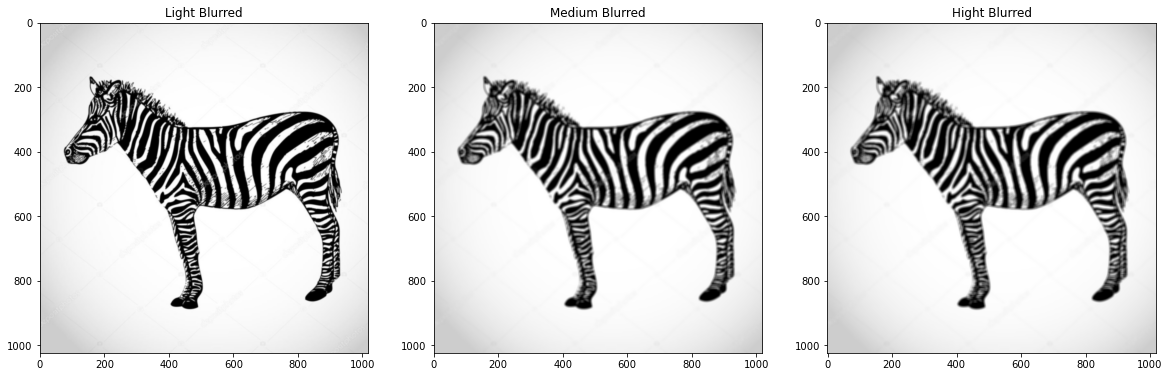

In [13]:
from PIL import Image
zebra = 'zebra.jpg'
image = cv2.imread(zebra)

blur_1 = cv2.GaussianBlur(image, (9,9), 1)
blur_5 = cv2.GaussianBlur(image, (9,9), 5)
blur_10 = cv2.GaussianBlur(image, (9,9), 10)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1),plt.imshow(blur_1,cmap = 'gray')
plt.title('Light Blurred')
plt.subplot(1,3,2),plt.imshow(blur_5,cmap = 'gray')
plt.title('Medium Blurred')
plt.subplot(1,3,3),plt.imshow(blur_10,cmap = 'gray')
plt.title('Hight Blurred')